In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.4/dist-packages


In [2]:
!pip install librosa

In [3]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [4]:
!apt-get update

Ign http://archive.ubuntu.com trusty InRelease
Get:1 http://archive.ubuntu.com trusty-updates InRelease [65.9 kB]
Get:2 http://archive.ubuntu.com trusty-security InRelease [65.9 kB]
Hit http://archive.ubuntu.com trusty Release.gpg     
Hit http://archive.ubuntu.com trusty Release         
Get:3 http://archive.ubuntu.com trusty-updates/main Sources [499 kB]
Get:4 http://archive.ubuntu.com trusty-updates/restricted Sources [6470 B]
Get:5 http://archive.ubuntu.com trusty-updates/universe Sources [238 kB]
Get:6 http://archive.ubuntu.com trusty-updates/main amd64 Packages [1268 kB]
Get:7 http://archive.ubuntu.com trusty-updates/restricted amd64 Packages [21.2 kB]
Get:8 http://archive.ubuntu.com trusty-updates/universe amd64 Packages [548 kB]
Get:9 http://archive.ubuntu.com trusty-security/main Sources [179 kB]          
Get:10 http://archive.ubuntu.com trusty-security/restricted Sources [5068 B]   
Get:11 http://archive.ubuntu.com trusty-security/universe Sources [74.7 kB]    
Get:12 http:/

In [5]:
!apt-get install -y libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libav-tools is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 66 not upgraded.


In [6]:
!apt-get install -y python-audioread 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-audioread is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 66 not upgraded.


In [7]:
y, sr = librosa.load("/notebooks/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
y

array([ -8.51912105e-08,   8.42505870e-08,  -7.91857531e-08, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

In [8]:
y, sr = librosa.load("/notebooks/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
y

array([ -8.51912105e-08,   8.42505870e-08,  -7.91857531e-08, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

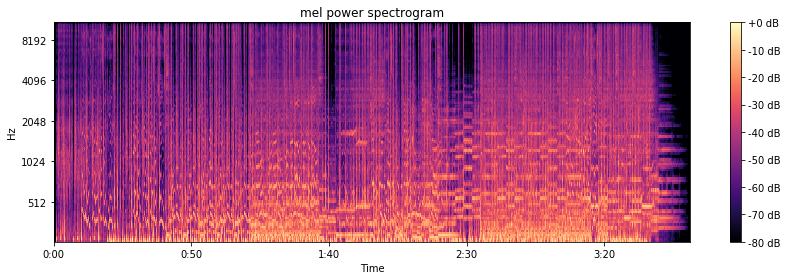

In [9]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
#log_S = librosa.logamplitude(S, ref_power=np.max)
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [10]:
S

array([[  1.93418567e-09,   4.22708243e-09,   3.58784660e-09, ...,
          3.01924225e-09,   3.35247565e-09,   2.53735976e-09],
       [  5.45121165e-10,   8.40816139e-10,   1.09254924e-09, ...,
          3.24268531e-10,   3.40564525e-11,   1.65781859e-10],
       [  1.03257853e-10,   3.55158653e-10,   6.25873765e-10, ...,
          6.55341874e-10,   3.97808283e-10,   2.30668353e-10],
       ..., 
       [  5.60411803e-10,   3.31274097e-09,   1.09277578e-08, ...,
          1.41995742e-08,   6.44005492e-09,   8.74244553e-10],
       [  3.13817425e-10,   2.53491924e-09,   4.66611382e-09, ...,
          6.48923387e-09,   2.42154595e-09,   3.75299178e-10],
       [  2.99520510e-11,   1.92666607e-10,   3.42596209e-10, ...,
          4.88223457e-10,   2.70519200e-10,   4.00955877e-11]])

In [11]:
log_S

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ..., 
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]])

In [12]:
y_harmonic, y_percussive = librosa.effects.hpss(y)


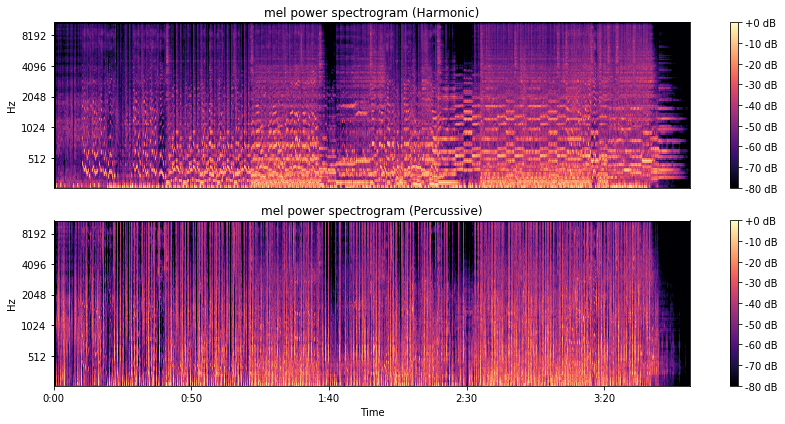

In [13]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

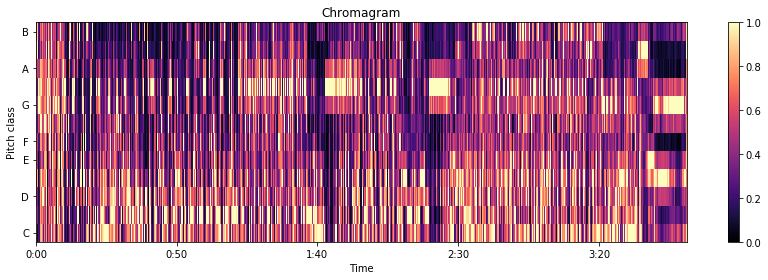

In [14]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

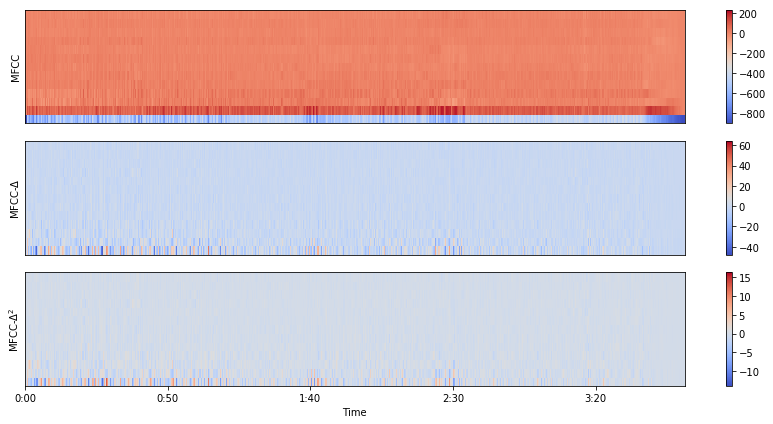

In [15]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

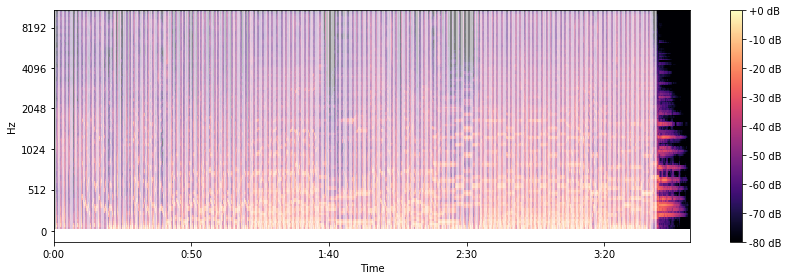

In [16]:
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [17]:
print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

# We could also get frame numbers from times by librosa.time_to_frames()

Estimated tempo:        129.20 BPM
First 5 beat frames:    [ 25  45  66  85 105]
First 5 beat times:     [ 0.58049887  1.04489796  1.53251701  1.97369615  2.43809524]


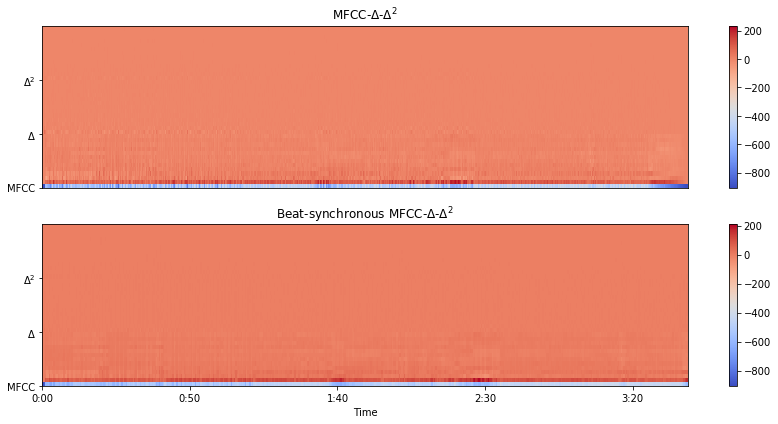

In [18]:
# feature.sync will summarize each beat event by the mean feature vector within that beat

M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12,6))

# Let's plot the original and beat-synchronous features against each other
plt.subplot(2,1,1)
librosa.display.specshow(M)
plt.title('MFCC-$\Delta$-$\Delta^2$')

# We can also use pyplot *ticks directly
# Let's mark off the raw MFCC and the delta features
plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()

plt.subplot(2,1,2)
# librosa can generate axis ticks from arbitrary timestamps and beat events also
librosa.display.specshow(M_sync, x_axis='time',
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Beat-synchronous MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

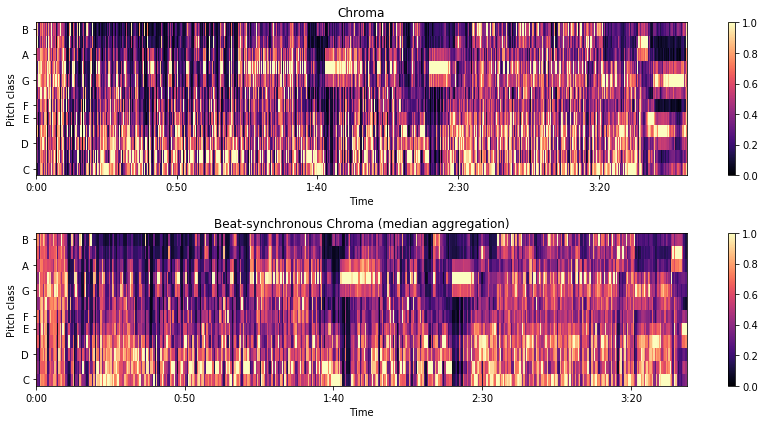

In [19]:
# Beat synchronization is flexible.
# Instead of computing the mean delta-MFCC within each beat, let's do beat-synchronous chroma
# We can replace the mean with any statistical aggregation function, such as min, max, or median.

C_sync = librosa.util.sync(C, beats, aggregate=np.median)

plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


plt.title('Beat-synchronous Chroma (median aggregation)')

plt.colorbar()
plt.tight_layout()